In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
holidayEvents=pd.read_csv ('/content/holidays_events.csv')
oil=pd.read_csv('/content/oil.csv')
stores=pd.read_csv('/content/stores.csv')
test=pd.read_csv('/content/test.csv')
train=pd.read_csv('/content/train.csv')
transactions=pd.read_csv('/content/transactions.csv')

In [3]:
train1 = train.merge(oil, on = 'date', how='left')
train1 = train1.merge(holidayEvents, on = 'date', how='left')
train1 = train1.merge(stores, on = 'store_nbr', how='left')
train1 = train1.merge(transactions, on = ['date', 'store_nbr'], how='left')
train1 = train1.rename(columns = {"type_x" : "holiday_type", "type_y" : "store_type"})

In [4]:
train1.tail()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,city,state,store_type,cluster,transactions
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,2155.0
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,2155.0
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,2155.0
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,2155.0
3054347,3000887,2017-08-15,9,SEAFOOD,16.000,0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,2155.0


In [5]:
def feature_eng(data):
    data['date'] = pd.to_datetime(data['date'])
    data['dayofweek'] = data['date'].dt.dayofweek
    data['quarter'] = data['date'].dt.quarter
    data['month'] = data['date'].dt.month
    data['year'] = data['date'].dt.year
    data['dayofyear'] = data['date'].dt.dayofyear
    data['dayofmonth'] = data['date'].dt.day
    return data
    
#store44 = feature_eng(store44)
train1 = feature_eng(train1)

In [6]:
train1.tail()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,city,state,store_type,cluster,transactions,dayofweek,quarter,month,year,dayofyear,dayofmonth
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,2155.0,1,3,8,2017,227,15
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,2155.0,1,3,8,2017,227,15
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,2155.0,1,3,8,2017,227,15
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,2155.0,1,3,8,2017,227,15
3054347,3000887,2017-08-15,9,SEAFOOD,16.000,0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,2155.0,1,3,8,2017,227,15


In [7]:
train1.groupby(by='family').sum()['sales']

family
AUTOMOTIVE                    5.663980e+05
BABY CARE                     1.033000e+04
BEAUTY                        3.456290e+05
BEVERAGES                     2.216635e+08
BOOKS                         6.540000e+03
BREAD/BAKERY                  4.295992e+07
CELEBRATION                   7.795020e+05
CLEANING                      9.942102e+07
DAIRY                         6.582360e+07
DELI                          2.458563e+07
EGGS                          1.588120e+07
FROZEN FOODS                  1.464694e+07
GROCERY I                     3.508273e+08
GROCERY II                    2.004966e+06
HARDWARE                      1.054760e+05
HOME AND KITCHEN I            1.905076e+06
HOME AND KITCHEN II           1.556511e+06
HOME APPLIANCES               4.232600e+04
HOME CARE                     1.640952e+07
LADIESWEAR                    6.685420e+05
LAWN AND GARDEN               5.596390e+05
LINGERIE                      6.645950e+05
LIQUOR,WINE,BEER              7.937172e+06
MAGA

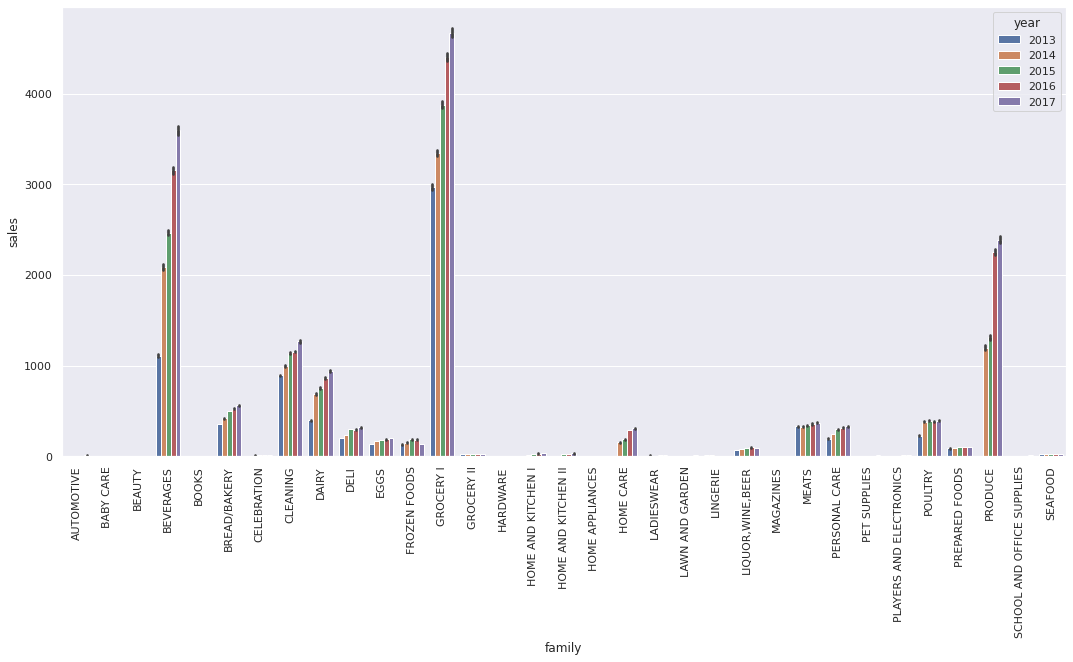

In [8]:
sns.set(rc={'figure.figsize':(18,8.27)})
ax=sns.barplot(x = 'family',y = 'sales',data = train1, hue='year')
fig=ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.savefig('Sales of Families')

Majority of the sales are contributed by 3 families of goods Grocery I, Beverages and Produce. 

Sales per  product for products with majority sales

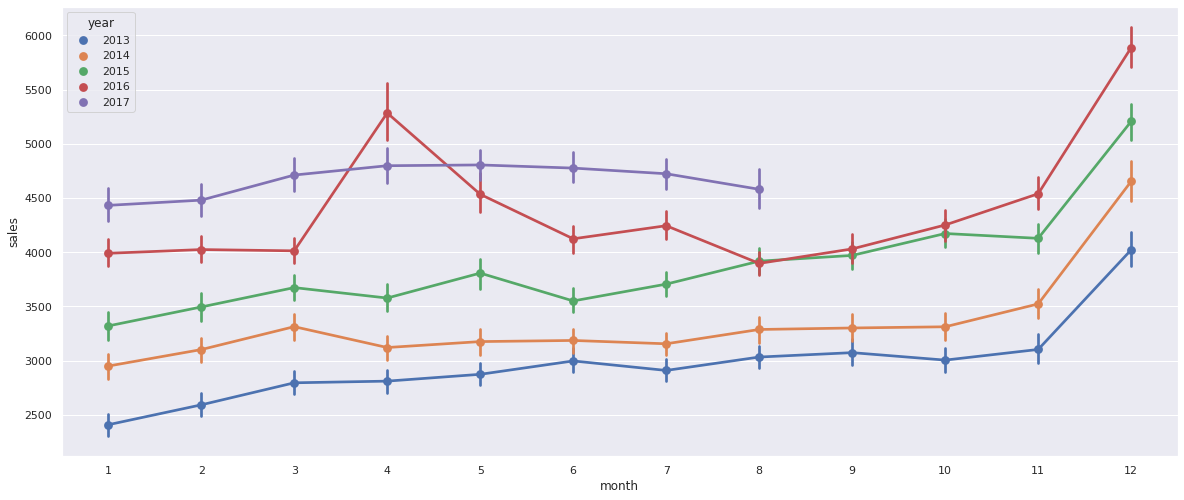

In [9]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.pointplot(x = 'month',y ='sales',data = train1[train1['family']=='GROCERY I'] ,hue = "year")

Sudden spike in sales of grocery I in year 2014 in the month of April.

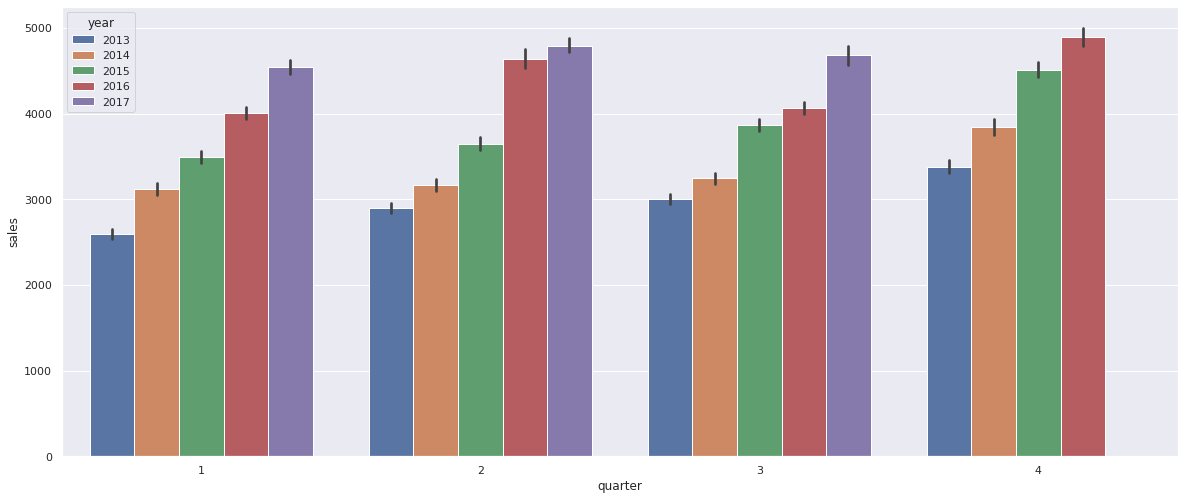

In [10]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'quarter',y ='sales',data = train1[train1['family']=='GROCERY I'] ,hue = "year")

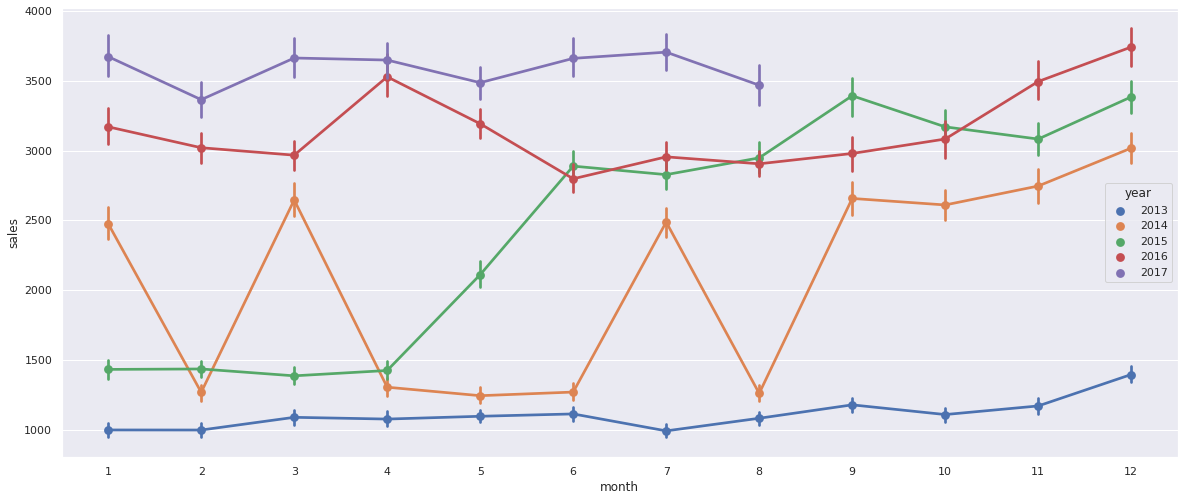

In [11]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.pointplot(x = 'month',y ='sales',data = train1[train1['family']=='BEVERAGES'] ,hue = "year")

Similar spike for Beverages too

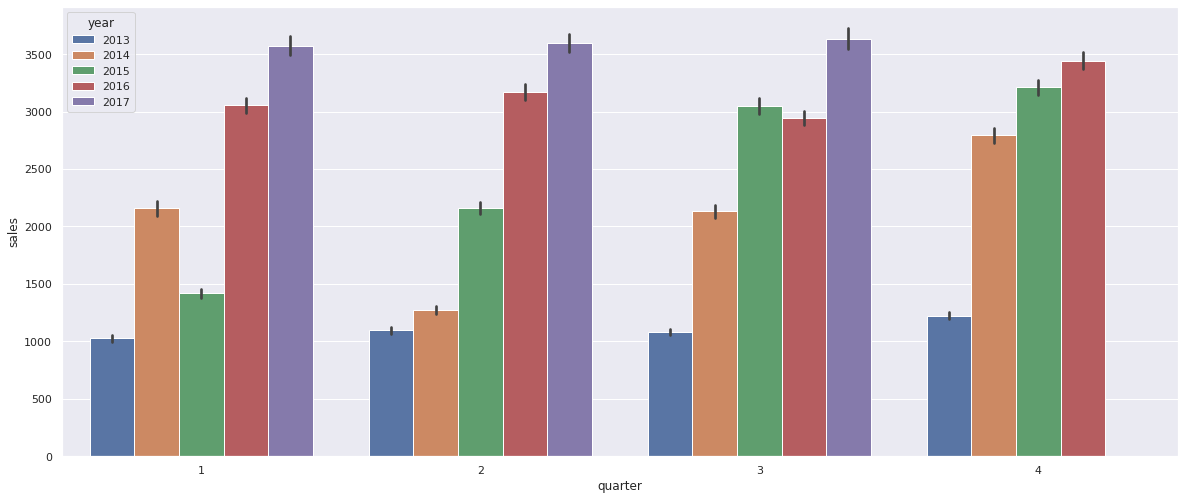

In [12]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'quarter',y ='sales',data = train1[train1['family']=='BEVERAGES'] ,hue = "year")

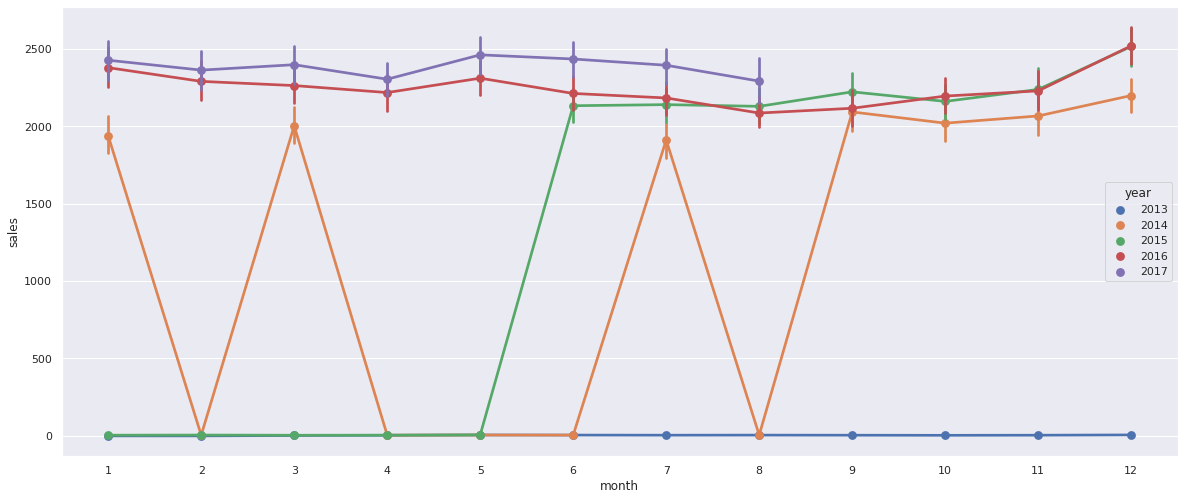

In [13]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.pointplot(x = 'month',y ='sales',data = train1[train1['family']=='PRODUCE'] ,hue = "year")

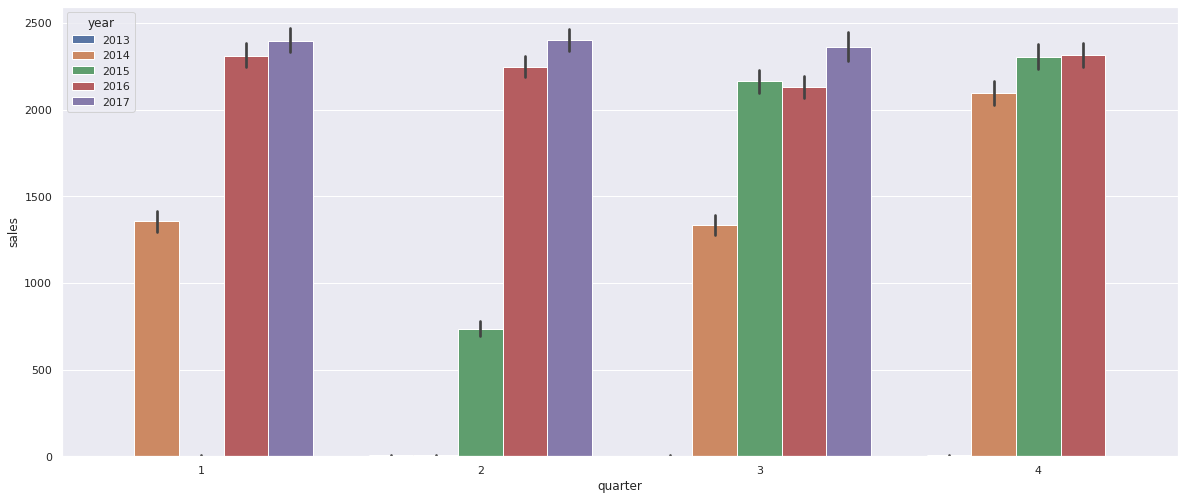

In [14]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'quarter',y ='sales',data = train1[train1['family']=='PRODUCE'] ,hue = "year")

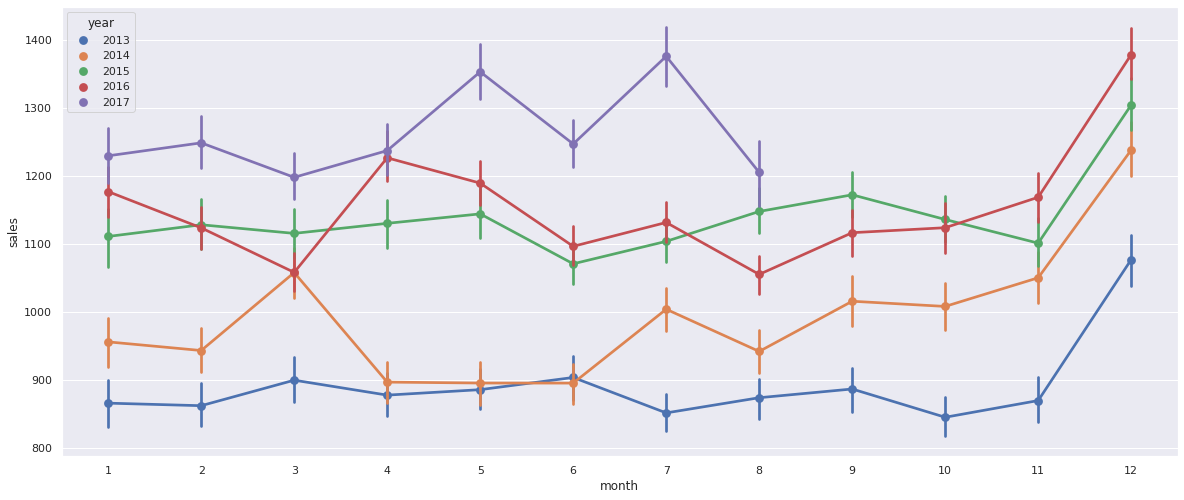

In [15]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.pointplot(x = 'month',y ='sales',data = train1[train1['family']=='CLEANING'] ,hue = "year")

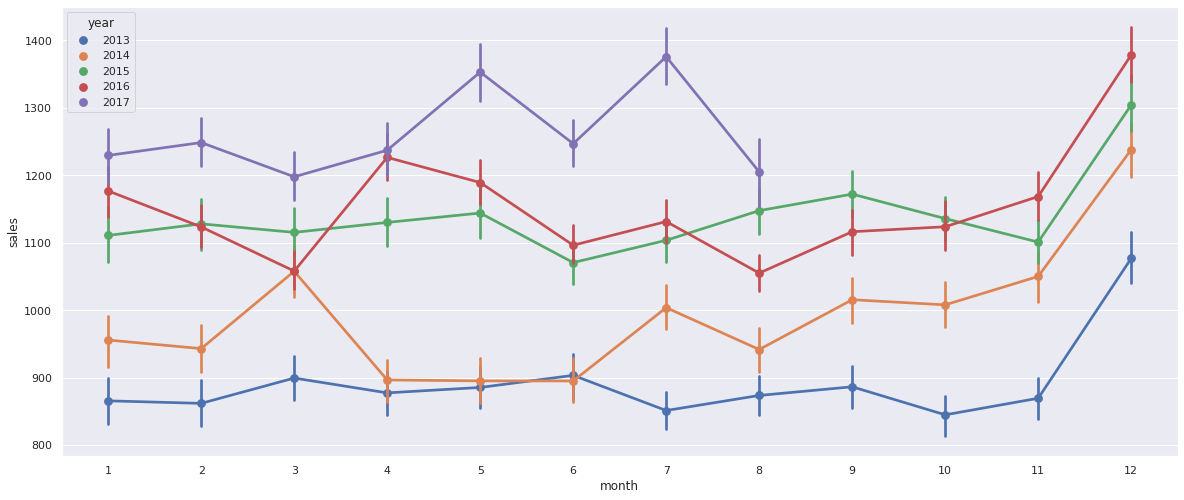

In [16]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.pointplot(x = 'month',y ='sales',data = train1[train1['family']=='CLEANING'] ,hue = "year")

Promtion V/s family

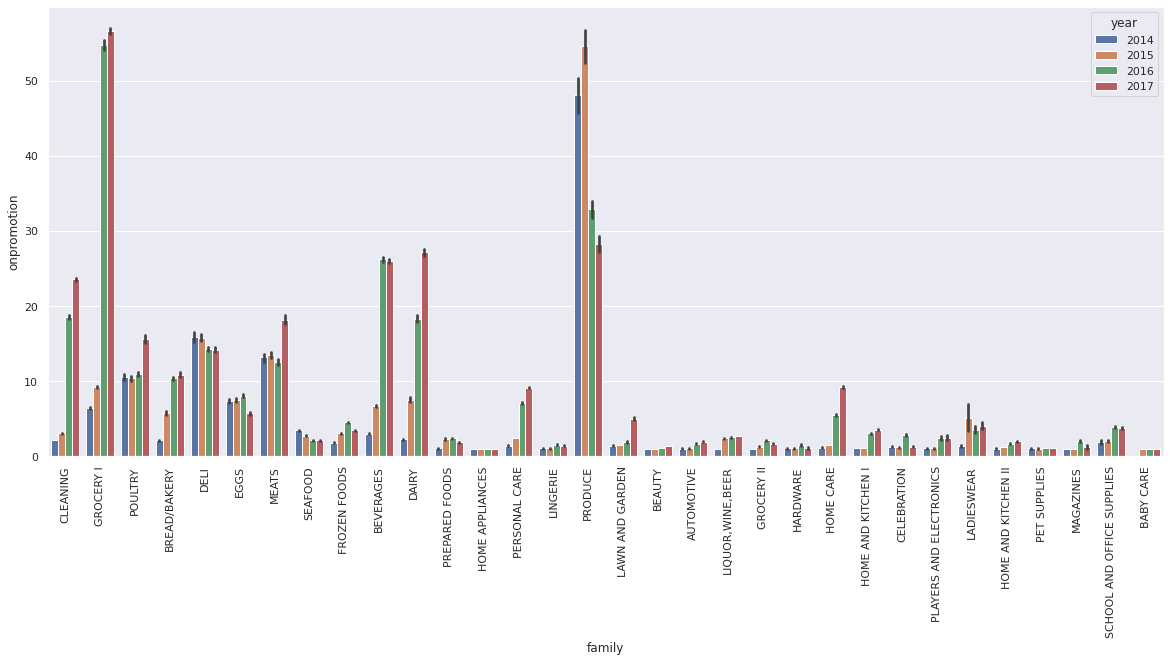

In [17]:
promotiondata=train1[train1['onpromotion']>0]
ax=sns.barplot(x = 'family',y = 'onpromotion',data = promotiondata, hue='year', )
fig=ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

Over the years most promotions also have been on Grocery I, Beverages and Produce

Sales of product on promotion

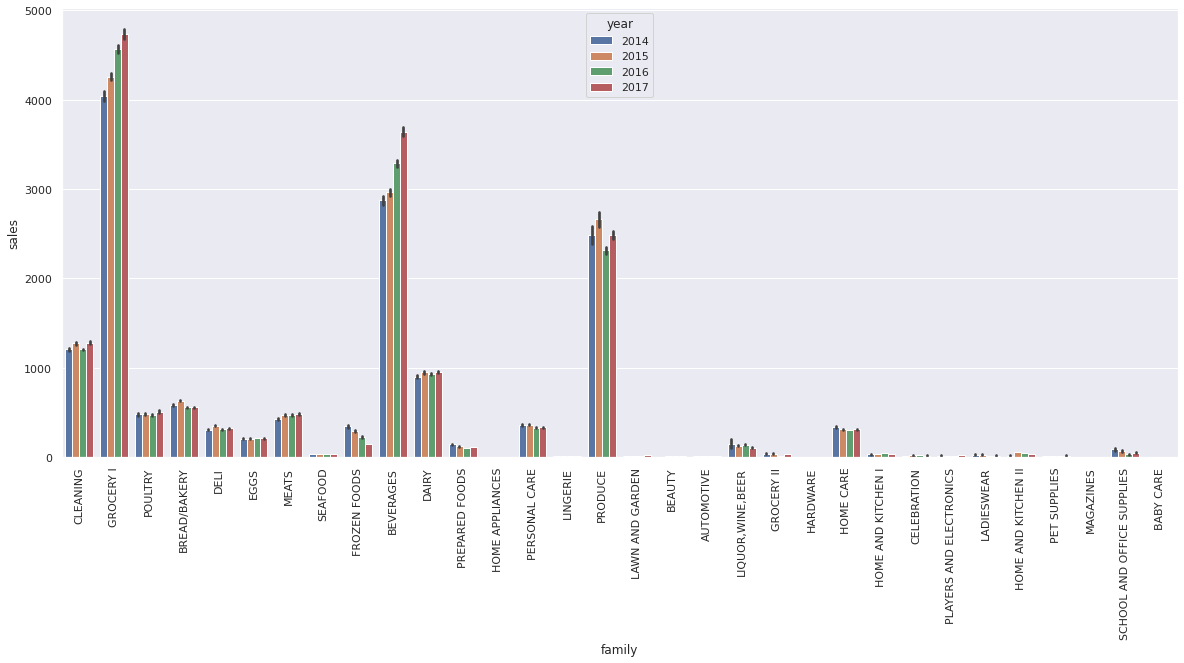

In [18]:
promotiondata=train1[train1['onpromotion']>0]
ax=sns.barplot(x = 'family',y = 'sales',data = promotiondata, hue='year')
fig=ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

Sales of Beverages, Grocery1 and produce are high irrespective of the promotion being applied on few products.




Effect of promotion on majorly sold products.

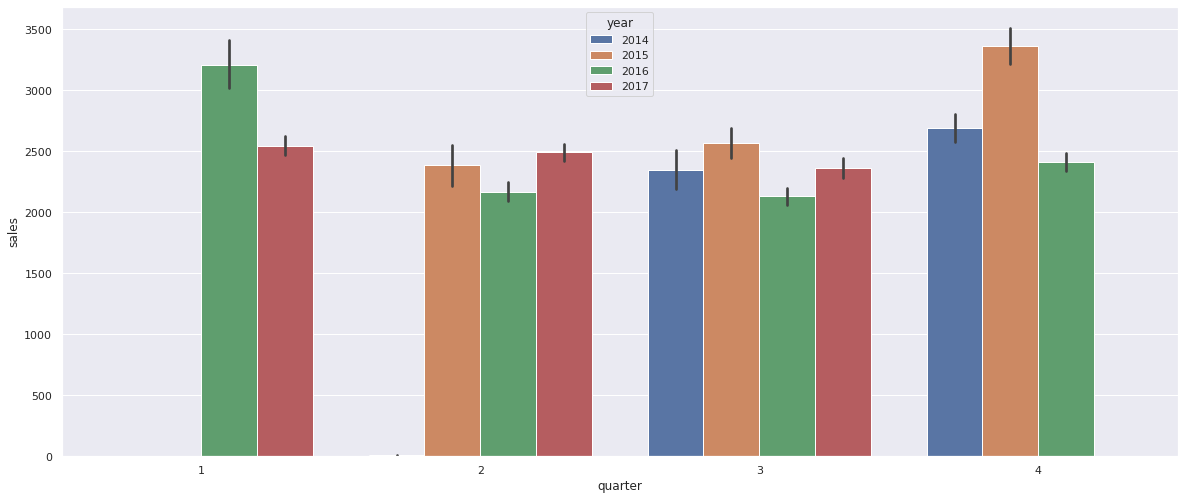

In [19]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'quarter',y ='sales',data = train1[(train1['family']=='PRODUCE') & (train1['onpromotion']>0)] ,hue = "year")

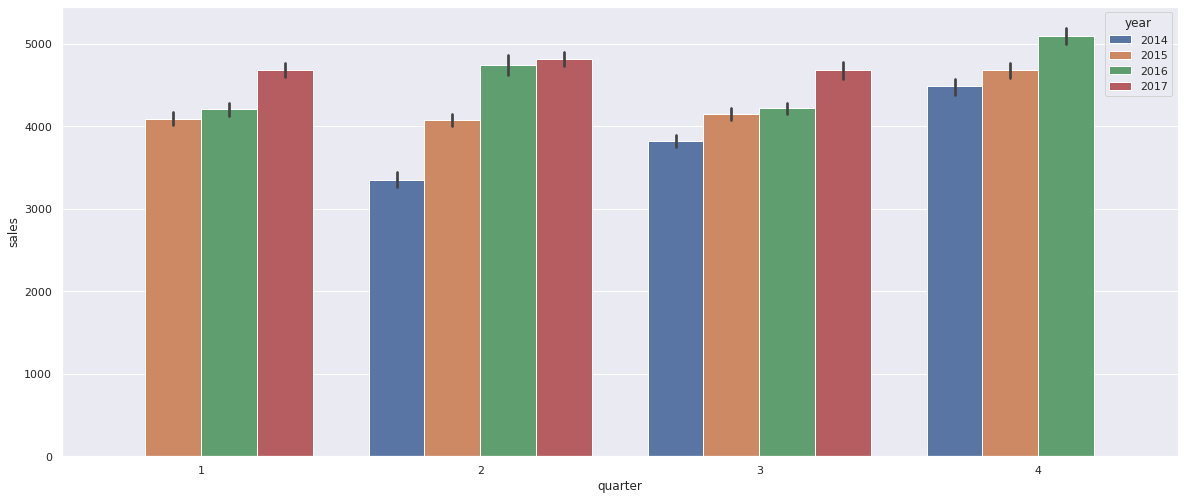

In [20]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'quarter',y ='sales',data = train1[(train1['family']=='GROCERY I') & (train1['onpromotion']>0)] ,hue = "year")

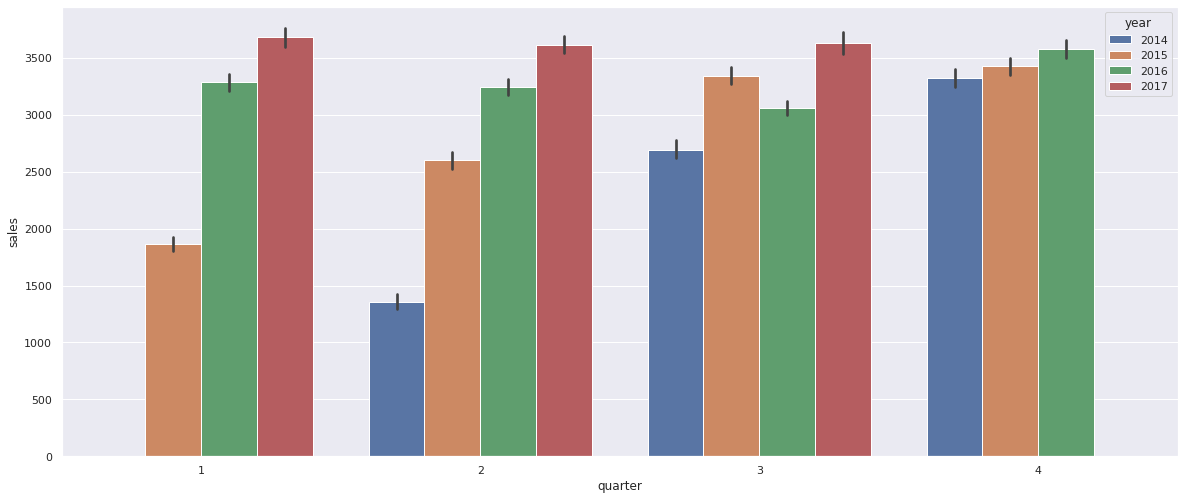

In [21]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'quarter',y ='sales',data = train1[(train1['family']=='BEVERAGES') & (train1['onpromotion']>0)] ,hue = "year")